In [1]:
# Nama : Lailatul Magfiroh
# NIM : 21051204023
# Kelas : TI 2021A

In [2]:
# Pencarian dataset
!kaggle datasets list -s "goal leagues"

ref                                                      title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
slehkyi/extended-football-stats-for-european-leagues-xg  Football Data: Expected Goals and Other Metrics    1MB  2020-08-02 17:28:39           6164        153  1.0              
sanjeetsinghnaik/most-expensive-footballers-2021         Most Expensive Footballers 2021                   13KB  2021-12-03 20:28:03           2236         51  1.0              
shreyanshkhandelwal/goal-dataset-top-5-european-leagues  Goal Dataset - Top 5 European Leagues            174KB  2021-05-23 21:20:09           4595         28  0.5294118        
secareanualin/football-events                            Football Events                                   21M

In [3]:
# Pengunduhan dataset
!kaggle datasets download shreyanshkhandelwal/goal-dataset-top-5-european-leagues


  0%|          | 0.00/174k [00:00<?, ?B/s]
100%|##########| 174k/174k [00:00<00:00, 327kB/s]
100%|##########| 174k/174k [00:00<00:00, 327kB/s]


In [9]:
!unzip goal-dataset-top-5-european-leagues.zip

Archive:  goal-dataset-top-5-european-leagues.zip
  inflating: Bundesliga-goalScorer(20-21).csv  
  inflating: LaLiga-goalScorer(20-21).csv  
  inflating: Ligue_1-goalScorer(20-21).csv  
  inflating: Serie_A-goalScorer(20-21).csv  
  inflating: epl-goalScorer(20-21).csv  


In [20]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('Bundesliga-goalScorer(20-21).csv')

In [23]:
df = pd.read_csv('LaLiga-goalScorer(20-21).csv')

In [24]:
df = pd.read_csv('Ligue_1-goalScorer(20-21).csv')

In [25]:
df = pd.read_csv('Serie_A-goalScorer(20-21).csv')

In [26]:
df = pd.read_csv('epl-goalScorer(20-21).csv')

In [31]:
# Menampilksn 5 baris pertama data
df.head()

,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [32]:
df_noid = df.iloc[:,2:]

In [33]:
print(df.dtypes)

Unnamed: 0        int64
id                int64
player_name      object
games             int64
time              int64
goals             int64
xG              float64
assists           int64
xA              float64
shots             int64
key_passes        int64
yellow_cards      int64
red_cards         int64
position         object
team_title       object
npg               int64
npxG            float64
xGChain         float64
xGBuildup       float64
dtype: object


In [35]:
df_noid.describe()

,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,1.668582,1.821450,5.663368,3.455060
std,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,2.909929,2.931176,5.600249,3.376584
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,0.000000,0.074668,1.191391,0.720353
50%,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,0.500000,0.715585,4.252738,2.656397
75%,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,2.000000,1.945799,8.308002,5.254647
max,38.000000,3420.000000,23.000000,22.174859,14.000000,11.474996,138.000000,95.000000,12.000000,2.000000,19.000000,19.130183,28.968234,18.323006


In [36]:
df_noid.describe(include='all')

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
count,522,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522,522,522.000000,522.000000,522.000000,522.000000
unique,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,28,NaN,NaN,NaN,NaN
top,Harry Kane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M S,Everton,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,28,NaN,NaN,NaN,NaN
mean,NaN,19.643678,1420.068966,1.862069,2.000806,1.289272,1.376029,17.379310,12.963602,2.061303,0.091954,NaN,NaN,1.668582,1.821450,5.663368,3.455060
std,NaN,11.619836,1031.604819,3.338851,3.317946,2.083350,1.886510,21.572664,16.164361,2.203661,0.295800,NaN,NaN,2.909929,2.931176,5.600249,3.376584
min,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,10.000000,470.250000,0.000000,0.074668,0.000000,0.049245,2.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.074668,1.191391,0.720353
50%,NaN,21.000000,1342.000000,1.000000,0.737295,0.000000,0.691122,10.000000,7.000000,2.000000,0.000000,NaN,NaN,0.500000,0.715585,4.252738,2.656397
75%,NaN,30.000000,2319.000000,2.000000,2.053378,2.000000,2.050509,23.750000,19.000000,3.000000,0.000000,NaN,NaN,2.000000,1.945799,8.308002,5.254647


In [41]:
df.groupby('goals')['assists'].std() 

goals
0     1.009649
1     1.420685
2     1.695582
3     2.023872
4     1.988981
5     3.689324
6     3.231787
7     1.718249
8     2.601282
9     2.316607
10    2.214670
11    3.114482
12    1.290994
13    0.000000
14         NaN
15         NaN
16         NaN
17    2.121320
18         NaN
22         NaN
23         NaN
Name: assists, dtype: float64

In [42]:
df.groupby('goals')['assists'].mean()

goals
0      0.443137
1      0.981481
2      1.714286
3      1.896552
4      2.428571
5      3.111111
6      5.222222
7      2.428571
8      3.900000
9      4.166667
10     2.714286
11     5.200000
12     3.500000
13     2.000000
14     5.000000
15     9.000000
16     0.000000
17     8.500000
18    12.000000
22     5.000000
23    14.000000
Name: assists, dtype: float64

In [43]:
# Visualisasi Data

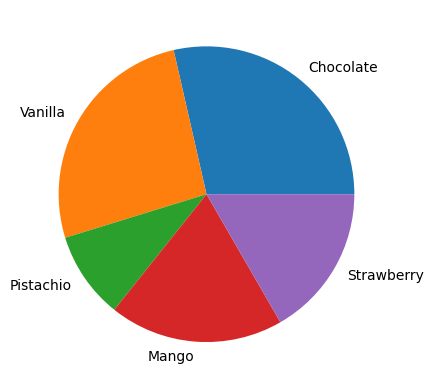

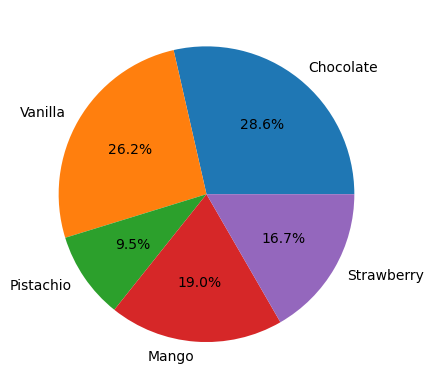

In [47]:
# Contoh Pie Chart
import matplotlib.pyplot as plt
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
plt.pie(votes, labels=flavors)
plt.show()

## Merubah jadi persentase
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
plt.pie(votes, labels=flavors, autopct='%1.1f%%',)
plt.show()

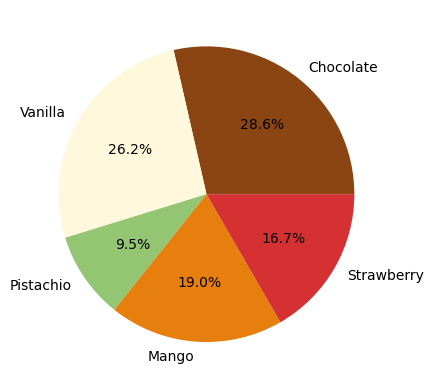

In [49]:
## Perubahan warna
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#D53032')
plt.pie(votes, labels=flavors, autopct='%1.1f%%', colors=colors)
plt.show()

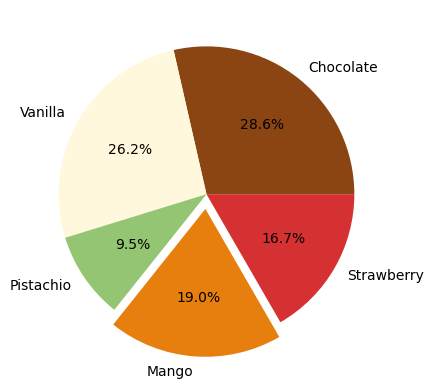

In [51]:
## Highlight salah satu bagan
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#D53032')
explode = (0, 0, 0, 0.1, 0)
plt.pie(votes, labels=flavors, autopct='%1.1f%%', colors=colors, 
explode=explode)
plt.show()

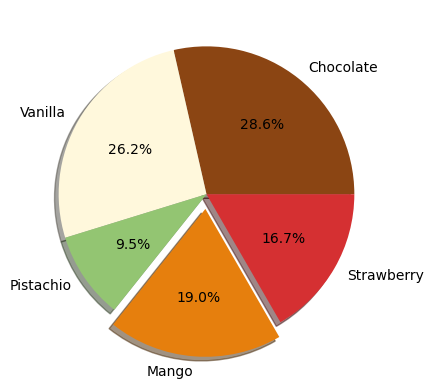

In [52]:
## Merubah menjadi 3 dimensi
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#D53032')
explode = (0, 0, 0, 0.1, 0)
plt.pie(votes, labels=flavors, autopct='%1.1f%%', colors=colors, 
explode=explode, shadow=True)
plt.show()

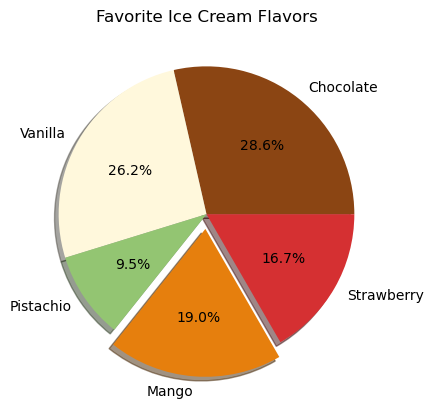

In [53]:
## Menambahkan judul pada pie chart
flavors = ('Chocolate', 'Vanilla', 'Pistachio', 'Mango', 'Strawberry')
votes = (12, 11, 4, 8, 7)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D', '#D53032')
explode = (0, 0, 0, 0.1, 0)
plt.title('Favorite Ice Cream Flavors')
plt.pie(votes, labels=flavors, autopct='%1.1f%%', colors=colors, 
explode=explode, shadow=True)
plt.show()

In [54]:
# BAR CHART

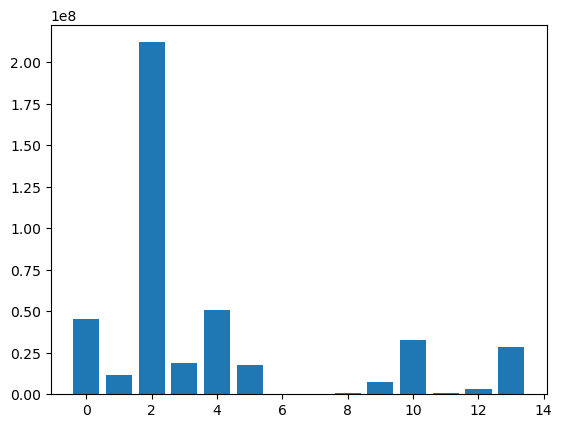

In [55]:
## Contoh ploting data populasi
countries = ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
'Ecuador','Falkland Islands', 'French Guiana', 'Guyana', 
'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 
17579085, 3481, 287750, 785409, 7107305, 32880332, 585169, 3470475, 
28258770)
x_coords = np.arange(len(countries))
plt.bar(x_coords, populations)
plt.show()

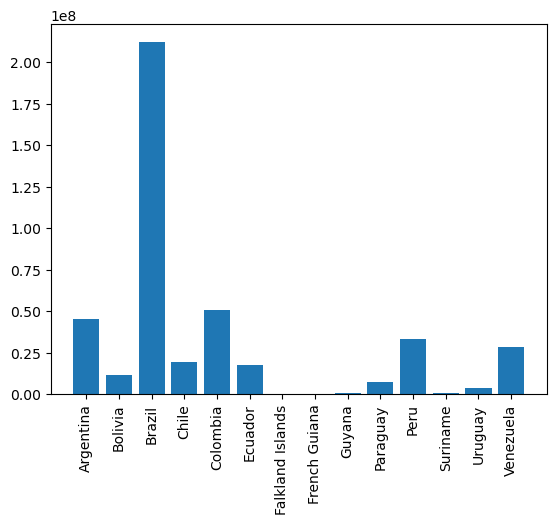

In [57]:
## Menambahkan label pada bar chart
countries = ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
'Ecuador','Falkland Islands', 'French Guiana', 'Guyana', 
'Paraguay', 'Peru','Suriname', 'Uruguay', 'Venezuela')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 
17579085, 3481, 287750, 785409, 7107305, 32880332, 585169, 3470475, 
28258770)
x_coords = np.arange(len(countries))
plt.bar(x_coords, populations, tick_label=countries)
plt.xticks(rotation=90) #rotates text for x-axis labels
plt.show()

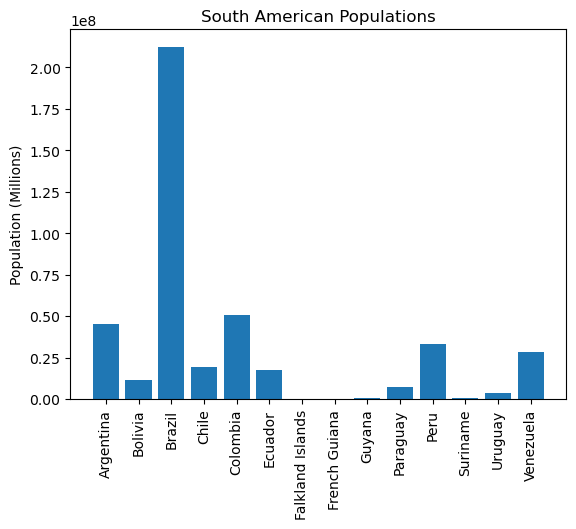

In [59]:
## Menambahkan label pada y
countries = ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 
'Paraguay', 'Peru','Suriname', 'Uruguay', 'Venezuela')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 
17579085, 3481, 287750, 785409, 7107305, 32880332, 585169, 3470475, 
28258770)
x_coords = np.arange(len(countries))
plt.bar(x_coords, populations, tick_label=countries)
plt.xticks(rotation=90)
plt.ylabel('Population (Millions)')
plt.title('South American Populations')
plt.show()

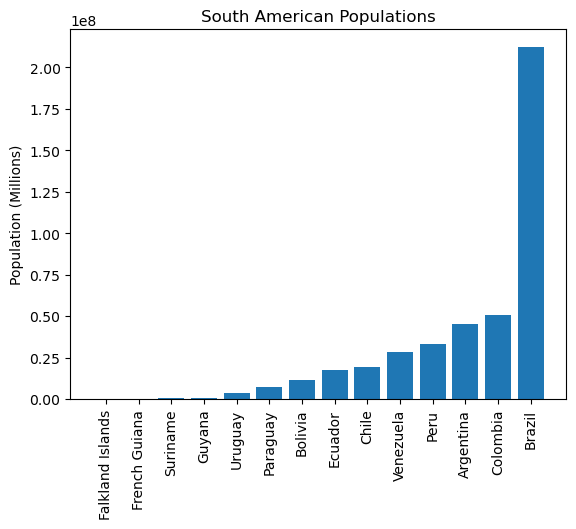

In [60]:
## Pengurutan jumlah populasi
countries = ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 
'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 
17579085, 3481, 287750, 785409, 7107305, 32880332, 585169, 3470475, 
28258770)
df = pd.DataFrame({'Country': countries,'Population': populations})
df.sort_values(by='Population', inplace=True)
x_coords = np.arange(len(df))
plt.bar(x_coords, df['Population'], tick_label=df['Country'])
plt.xticks(rotation=90)
plt.ylabel('Population (Millions)')
plt.title('South American Populations')
plt.show()

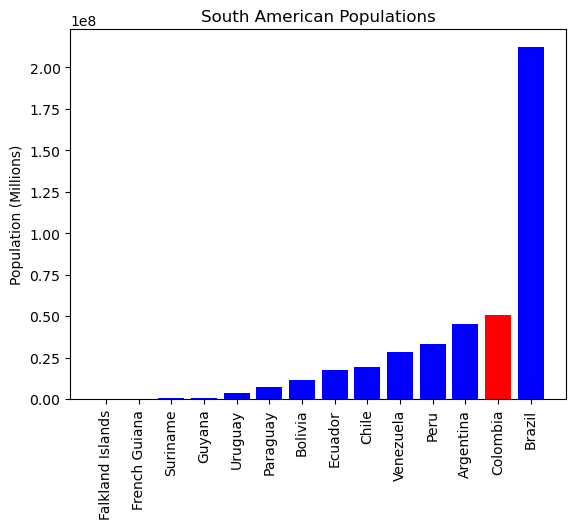

In [62]:
## Memanggil salah satu negara atau menghighlightnya
countries = ('Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana',
'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela')
populations = (45076704, 11626410, 212162757, 19109629, 50819826, 
17579085, 3481, 287750, 785409, 7107305, 32880332, 585169, 3470475, 
28258770)
df = pd.DataFrame({'Country': countries,'Population': populations})
df.sort_values(by='Population', inplace=True)
x_coords = np.arange(len(df))
colors = ['#0000FF' for _ in range(len(df))]
colors[-2] = '#FF0000'
plt.bar(x_coords, df['Population'], tick_label=df['Country'], 
color=colors)
plt.xticks(rotation=90)
plt.ylabel('Population (Millions)')
plt.title('South American Populations')
plt.show()